## **TASK 05: TOPIC MODELING**

### Using BERTopic On Reddit Dataset

In [2]:
# Installing bertopic

!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.2 MB/s eta 0:00:00


In [3]:
# Importing necessary libraries

import pandas as pd
from bertopic import BERTopic

In [12]:
# Loading the Reddit dataset

reddit_data = pd.read_csv('/content/reddit_posts_with_sentiments.csv')

# Preparing the text data

reddit_texts = reddit_data["Processed Title"].apply(eval).apply(' '.join)

# Initializing the BERTopic model

topic_model = BERTopic(language="english")

# Fitting the model and transforming the data

topics, probs = topic_model.fit_transform(reddit_texts)

# Getting topic information

topic_info = topic_model.get_topic_info()
print("Topic Information:\n", topic_info)

# Getting keywords for each topic

for topic_num in topic_info["Topic"].unique():
    if topic_num != -1:  # Excluding 'outlier' topics
        print(f"\nTopic {topic_num} Keywords:")
        print(topic_model.get_topic(topic_num))

# Visualizing the topics

topic_model.visualize_topics()

Topic Information:
    Topic  Count                           Name  \
0      0     80  0_thread_israel_rworldnew_war   
1      1     60  1_zelenskyy_putin_world_whole   
2      2     60     2_ukrain_kill_fight_korean   
3      3     50      3_forc_moscow_bomb_russia   
4      4     20     4_cnn_confirm_unearth_task   

                                      Representation  \
0  [thread, israel, rworldnew, war, live, ukrain,...   
1  [zelenskyy, putin, world, whole, denmark, paul...   
2  [ukrain, kill, fight, korean, us, north, alloc...   
3  [forc, moscow, bomb, russia, russian, kill, li...   
4  [cnn, confirm, unearth, task, viral, syria, pr...   

                                 Representative_Docs  
0  [breakthrough israel 's normal talk saudi arab...  
1  [whale activist paul watson celebr releas jail...  
2  [‘ sever hundr ’ north korean troop kill fight...  
3  [spain plan tighten law forc 'influenc rectifi...  
4  [assad 's fall task unearth dead syria 's mass...  

Topic 0 Key

In [14]:
# Save topics and keywords to a text file and a HTML file

with open("reddit_topics.txt", "w") as file:
    for topic_num in topic_info["Topic"].unique():
        if topic_num != -1:  # Exclude "outlier" topics
            file.write(f"Topic {topic_num}:\n")
            keywords = topic_model.get_topic(topic_num)
            for word, score in keywords:
                file.write(f"  {word}: {score:.4f}\n")
            file.write("\n")

topic_visualization = topic_model.visualize_topics()
topic_visualization.write_html("reddit_topics_visualization.html")

print("Interactive map has been saved as 'reddit_topics_visualization.html'.")

print("Topics and keywords have been saved to 'reddit_topics.txt'.")

Interactive map has been saved as 'reddit_topics_visualization.html'.
Topics and keywords have been saved to 'reddit_topics.txt'.


### Using LDA On News Articles

In [31]:
# Importing necessary libraries

from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from IPython.display import display, HTML

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [33]:
# Loading the News Articles dataset

news_data = pd.read_csv('/content/news_articles_with_sentiments.csv')

# Preparing the data

news_texts = news_data["Processed Text"].apply(eval)

# Preparing Gensim's Dictionary and Corpus

dictionary = Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]

# Initializing the LDA model with Gensim

lda_model = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary, random_state=42)

# Getting topic information

topics = lda_model.print_topics(num_words=10)
print("Topic Information:\n")
for idx, topic in topics:
    print(f"Topic {idx}:\n{topic}\n")

# Saving topics and keywords to a text file

with open("news_topics.txt", "w") as file:
    for idx, topic in topics:
        file.write(f"Topic {idx}:\n{topic}\n\n")

print("Topics and keywords have been saved to 'news_topics.txt'.")

# Creating the interactive visualization

visualization = gensimvis.prepare(lda_model, corpus, dictionary)

# Saving the visualization to an HTML file

pyLDAvis.save_html(visualization, "news_topics_visualization.html")
print("Interactive map has been saved as 'news_topics_visualization.html'.")

# Displaying the visualization inline

display(HTML(pyLDAvis.display(visualization).data))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic Information:

Topic 0:
0.025*"char" + 0.006*"trump" + 0.006*"donald" + 0.006*"world" + 0.006*"year" + 0.005*"article" + 0.005*"offering" + 0.005*"first" + 0.005*"presidentelect" + 0.005*"event"

Topic 1:
0.022*"char" + 0.007*"’" + 0.006*"ho" + 0.005*"month" + 0.004*"news" + 0.004*"…" + 0.004*"release" + 0.004*"said" + 0.004*"december" + 0.004*"capability"

Topic 2:
0.018*"char" + 0.009*"drag" + 0.007*"king" + 0.006*"game" + 0.006*"presidentelect" + 0.005*"park" + 0.005*"year" + 0.005*"object" + 0.005*"many" + 0.005*"industry"

Topic 3:
0.029*"char" + 0.008*"new" + 0.005*"year" + 0.005*"–" + 0.005*"time" + 0.005*"news" + 0.004*"u" + 0.004*"flag" + 0.004*"country" + 0.004*"report"

Topic 4:
0.032*"char" + 0.009*"world" + 0.008*"news" + 0.006*"free" + 0.006*"new" + 0.006*"’" + 0.006*"content" + 0.005*"access" + 0.005*"first" + 0.004*"around"

Topics and keywords have been saved to 'news_topics.txt'.
Interactive map has been saved as 'news_topics_visualization.html'.


### Using Non - Negative Matrix Factorization (NMF) on Tweets Dataset

In [45]:
# Importing necessary libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import plotly.express as px
import plotly.graph_objects as go

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [47]:
# Loading the tweets dataset

tweets_data = pd.read_csv('/content/trending_tweets_with_sentiments.csv')

# Preparing data

tweets_texts = tweets_data["Text"]

# Converting text data into a TF-IDF matrix

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(tweets_texts)

# Initializing the NMF model

nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(tfidf)

# Extracting topics and keywords

feature_names = tfidf_vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(nmf_model.components_):
    topics[f"Topic {topic_idx}"] = [
        (feature_names[i], topic[i]) for i in topic.argsort()[:-11:-1]
    ]

# Displaying topic information

print("Topics and Keywords:")
for topic, keywords in topics.items():
    print(f"\n{topic}:")
    for word, score in keywords:
        print(f"  {word}: {score:.4f}")

# Saving topic information to a text file

with open("tweets_topics.txt", "w") as file:
    for topic, keywords in topics.items():
        file.write(f"{topic}:\n")
        for word, score in keywords:
            file.write(f"  {word}: {score:.4f}\n")
        file.write("\n")

print("Topics and keywords have been saved to 'tweets_topics.txt'.")

# Preparing the data for Plotly visualization

visualization_data = []
for topic_idx, keywords in topics.items():
    for word, score in keywords:
        visualization_data.append({"Topic": f"Topic {topic_idx}", "Word": word, "Score": score})

df_visualization = pd.DataFrame(visualization_data)

# Creating an interactive Plotly visualization

fig = px.bar(
    df_visualization,
    x="Score",
    y="Word",
    color="Topic",
    orientation="h",
    title="Top Words by Topic",
    height=600,
    facet_col="Topic",
    facet_col_wrap=3,
)

fig.update_layout(showlegend=False)
fig.write_html("tweets_topics_interactive.html")
fig.show()

print("Interactive visualization has been saved as 'tweets_topics_interactive.html'.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topics and Keywords:

Topic 0:
  tonight: 1.0080
  watching: 0.5138
  lock: 0.5040
  fanduel: 0.5040
  sportsbetting: 0.5040
  sportsgambling: 0.5040
  winning: 0.5040
  betting: 0.5040
  gamblingtwitter: 0.5040
  paid: 0.5040

Topic 1:
  kcr: 0.8721
  ponnala: 0.5814
  చర: 0.2907
  vijayareddy_r: 0.2907
  ahistory: 0.2907
  democracy: 0.2907
  fourteen: 0.2907
  kcrbrspresident: 0.2907
  ఒక: 0.2907
  ktrbrs: 0.2907

Topic 2:
  news: 0.7360
  breakingnews: 0.6815
  currentevents: 0.6480
  cafawards2024: 0.6480
  worldnews: 0.6384
  police: 0.2166
  britain: 0.2020
  christmas: 0.1370
  just: 0.1338
  claims: 0.1193

Topic 3:
  fyp: 0.9987
  viral: 0.9311
  explorepage: 0.5892
  explore: 0.4576
  vibes: 0.4413
  design: 0.3242
  family: 0.3224
  memes: 0.3198
  drop: 0.3198
  trendingnow: 0.2280

Topic 4:
  nifty: 0.3399
  nifty50: 0.3399
  stockmarketindia: 0.3399
  check: 0.3127
  stockstobuy: 0.2779
  stockstowatch: 0.2779
  stockstotrade: 0.2779
  stocksinfocus: 0.2779
  stocks: 0.2

Interactive visualization has been saved as 'tweets_topics_interactive.html'.


### Combining All Three Datasets For Next Steps

In [49]:
# Loading the datasets
news_data = pd.read_csv('/content/news_articles_with_sentiments.csv')
reddit_data = pd.read_csv('/content/reddit_posts_with_sentiments.csv')
tweets_data = pd.read_csv('/content/trending_tweets_with_sentiments.csv')

# Standardizing column names for combination

news_data['TimeStamp'] = news_data['Published At']
news_data['Text'] = news_data['Content']
news_data['Tokens'] = news_data['Processed Text']
news_data['Bigrams'] = news_data['Bigrams']
news_data['Sentiment'] = news_data['Sentiment']

reddit_data['TimeStamp'] = reddit_data['Created_At']
reddit_data['Text'] = reddit_data['Title']
reddit_data['Tokens'] = reddit_data['Processed Title']
reddit_data['Bigrams'] = reddit_data['Bigrams']
reddit_data['Sentiment'] = reddit_data['Sentiment']

tweets_data['TimeStamp'] = tweets_data['Created At']
tweets_data['Text'] = tweets_data['Text']
tweets_data['Tokens'] = tweets_data['Processed Text']
tweets_data['Bigrams'] = tweets_data['Bigrams']
tweets_data['Sentiment'] = tweets_data['Sentiment']

# Selecting only the standardized columns

columns_to_combine = ['TimeStamp', 'Text', 'Tokens', 'Bigrams', 'Sentiment']
news_combined = news_data[columns_to_combine]
reddit_combined = reddit_data[columns_to_combine]
tweets_combined = tweets_data[columns_to_combine]

# Combining all datasets into one

combined_dataset = pd.concat([news_combined, reddit_combined, tweets_combined], ignore_index=True)

# Saving the combined dataset to a CSV file

combined_dataset.to_csv('combined_dataset.csv', index=False)

print("Combined dataset has been saved as 'combined_dataset.csv'.")
print(combined_dataset.head())

Combined dataset has been saved as 'combined_dataset.csv'.
              TimeStamp                                               Text  \
0  2024-12-17T10:51:39Z  Fabio Quartararo has said he was impressed by ...   
1  2024-12-17T10:50:41Z  Author of the article:\r\nArticle content\r\nB...   
2  2024-12-17T10:48:17Z  Rashid Vally, the visionary behind South Afric...   
3  2024-12-17T10:47:08Z  <ol><li>Richard Smith, chair</li></ol><ol><li>...   
4  2024-12-17T10:45:07Z  Caracol’s acclaimed series El Secretario\r\nNE...   

                                              Tokens  \
0  ['fabio', 'quartararo', 'said', 'impressed', '...   
1  ['author', 'article', 'article', 'content', 'b...   
2  ['rashid', 'vally', 'visionary', 'behind', 'so...   
3  ['ollirichard', 'smith', 'chairliololliuk', 'h...   
4  ['caracol', '’', 'acclaimed', 'series', 'el', ...   

                                             Bigrams Sentiment  
0  [('fabio', 'quartararo'), ('quartararo', 'said...  positive  
1  [(

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## **TASK 06: STYLOMETRIC ANALYSIS AND VISUALIZATION**

In [50]:
# Importing necessary libraries

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [57]:
# Loading the combined dataset

data = pd.read_csv('/content/combined_dataset.csv')
print(data)

                     TimeStamp  \
0         2024-12-17T10:51:39Z   
1         2024-12-17T10:50:41Z   
2         2024-12-17T10:48:17Z   
3         2024-12-17T10:47:08Z   
4         2024-12-17T10:45:07Z   
..                         ...   
447  2024-12-18 10:28:28+00:00   
448  2024-12-18 10:28:11+00:00   
449  2024-12-18 10:27:48+00:00   
450  2024-12-18 10:27:37+00:00   
451  2024-12-18 10:27:17+00:00   

                                                  Text  \
0    Fabio Quartararo has said he was impressed by ...   
1    Author of the article:\r\nArticle content\r\nB...   
2    Rashid Vally, the visionary behind South Afric...   
3    <ol><li>Richard Smith, chair</li></ol><ol><li>...   
4    Caracol’s acclaimed series El Secretario\r\nNE...   
..                                                 ...   
447  LET GET PAID AGAIN TONIGHT 🤑🤑\nTAP IN THE LINK...   
448  WORKOUT INSPO 🏋🏾\n\n#arms \n#athlete #fitness ...   
449  Keep enjoying the vibes.   Good music only.   ...   
450  LET GE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [58]:
# Stylometric Feature Extraction
# Token lengths

data['token_length'] = data['Tokens'].apply(lambda x: len(eval(x)))

# Average word length

data['average_word_length'] = data['Tokens'].apply(lambda x: np.mean([len(word) for word in eval(x)]))

# Word frequency (number of unique words normalized by total tokens)

data['word_frequency'] = data['Tokens'].apply(lambda x: len(set(eval(x))) / len(eval(x)))

# Sentence lengths (assuming Text column represents sentences)

data['sentence_length'] = data['Text'].apply(lambda x: len(str(x).split('.')))

# Stylistic marker: Ratio of punctuation to total characters

data['punctuation_ratio'] = data['Text'].apply(lambda x: sum([1 for char in str(x) if char in '.,!?;:']) / len(str(x)))

# Create a feature matrix

features = data[['token_length', 'average_word_length', 'word_frequency', 'sentence_length', 'punctuation_ratio']].values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
# PCA for Dimensionality Reduction

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [60]:
# K-Means Clustering

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(reduced_features)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



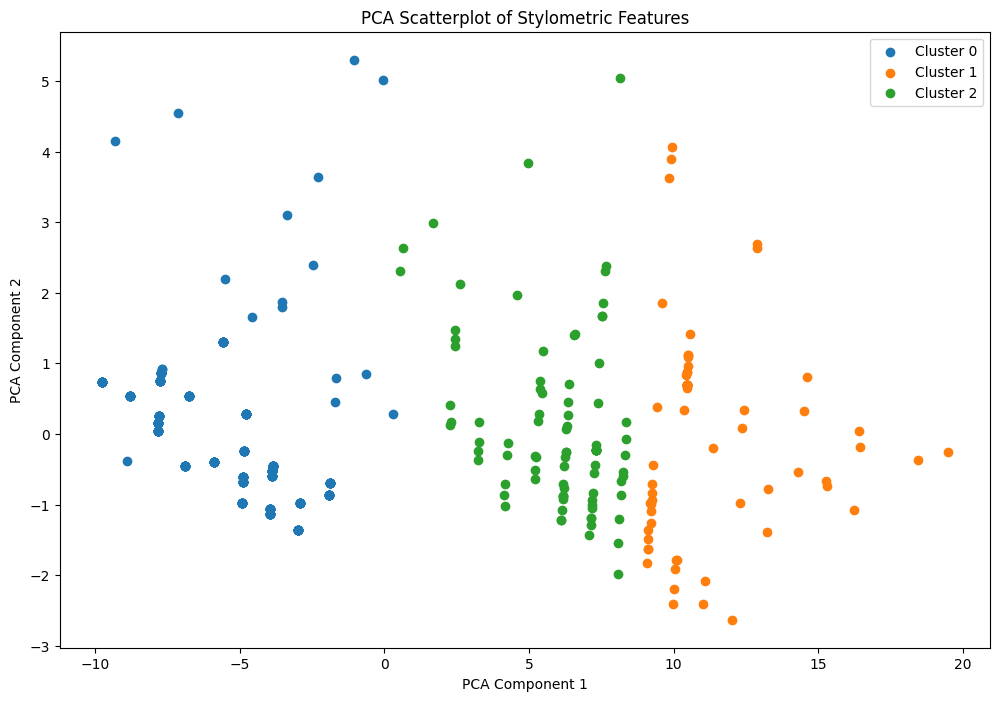

In [61]:
# PCA Scatterplot

plt.figure(figsize=(12, 8))
for cluster in range(3):
    cluster_points = reduced_features[data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')
plt.title('PCA Scatterplot of Stylometric Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



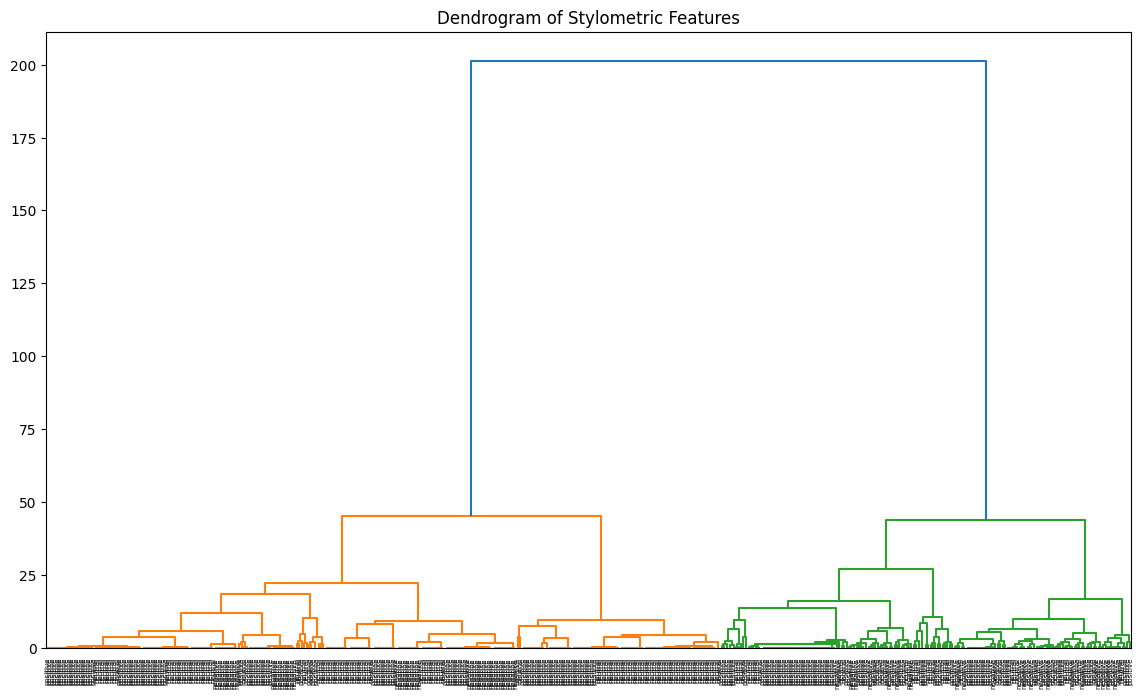

In [66]:
# Dendrogram

linked = linkage(features, method='ward')
plt.figure(figsize=(14, 8))
dendrogram(linked, labels=data['Sentiment'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram of Stylometric Features')
plt.show()

In [68]:
# Saving the processed dataset

processed_file_path = 'stylometric_features_dataset.csv'
data.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved to {processed_file_path}")

Processed dataset saved to stylometric_features_dataset.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

